In [1]:
import sys
import os
import cobra
import cplex 
import libsbml
import pandas as pd
import copy
from pathlib import Path
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from cobra import Reaction

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#Change working dir first, ty ChatGPT, much loves
cwd = os.getcwd()
# Split the path into a list of directories
directories = cwd.split(os.sep)
# Remove the last two directories from the list
directories = directories[:-2]
# Join the directories back into a path
new_cwd = os.sep.join(directories)
# Change the current working directory to the new path
os.chdir(new_cwd)

sys.path.append("./src")

import model_initialize as model_init
import model_manipulation  as mm



50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500,Coleoptile_Biomass_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,Straw_Biomass_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,ACCOAC_OSAc_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,ACCOAC_OSAr_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,ACPC_OSs_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,ACPC_OSm_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,FAC_Osc_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,FAC_Osr_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,EX_co2(e)\t-4.089457161738791\t-6.510073304667376\t-8.916758222571382\t-11.321646693964675\t-13.726535165357973\t-16.131423636751244\t-18.516669061793912\t-20.750873090511185\t-22.200000000000028\t-22.199999999999925\t-22.200000000000028\t-22.200000000000017\t-22.200000000000035\t-22.20000000000001\t-22.199999999999992\t-22.200000000000003\t-22.199999999999925\t-22.20000000000003\t-22.20000000000004\t-22.199999999999967\t-22.200000000000074\t-22.200000000000028\t-22.199999999985646\t-22.19999999999993\t-22.20000000000003\t-22.19999999995815\t-22.199999999999967\t-22.200000000000117\t-22.200000000000834\t-22.199999999999957,EX_h2o(e)\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,...,acon-C_pd\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,succ_pd\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,trans_PPCs_M\t0.08782400079639952\t0.13980845390507246\t0.1914937240490338\t0.24314041422669302\t0.29478710440424744\t0.3464337945818514\t0.39765863636975496\t0.44563975675737155\t0.4767607876961052\t0.47676078769606717\t0.47676078769608804\t0.4767607876959641\t0.4767607876961041\t0.47676078769660624\t0.47676078769613267\t0.4767607876961904\t0.47676078769609503\t0.47676078770667996\t0.47676078769610475\t0.47676078769604896\t0.47676078769610414\t0.47676078769609853\t0.4767607876962785\t0.4767607876967874\t0.4767607876960596\t0.47676078769538033\t0.4767607876961636\t0.47676078769608643\t0.47676078769619623\t0.4767607876974907,trans_PPDKs_M\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,trans_PPDKs_BS\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0,trans_MDHym_M\t0.026831233236687995\t0.04271307616565393\t0.05850351528891923\t0.07428216779271589\t0.09006082029650832\t0.0\t0.0\t0.0\t0.0\t0.1314130908437292\t0.131413090843748\t0.13141309090976727\t0.1314130908437398\t0.1314130908437329\t0.13141309084374686\t0.1314130908437503\t0.13141309084443378\t0.13141309084374944\t0.13141309084373984\t0.1314130908451699\t0.13141309084437217\t0.1314130908437363\t0.1314130908436501\t0.13141309084408576\t0.13141309084377212\t0.13141309084348968\t

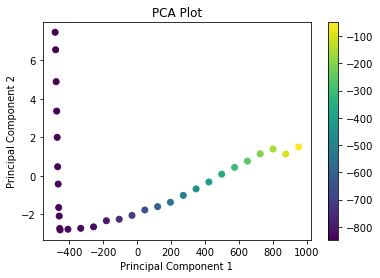

In [21]:
#Open


# Load the data from a CSV file
# wt_ppfd_data = pd.read_csv('path/to/csv/file.csv')
wt_ppfd_scan = pd.read_csv('./flux_results/PPFD_benchmark/FBA/WT/old/PPFD-benchmark-WT-model-Mature-Leaf-20230316-04:19.tsv', sep='\t', index_col=0).T

trans_ppfd_scan = pd.read_csv('./flux_results/PPFD_benchmark/FBA/Trans/PPFD-benchmark-trans-model-Mature-Leaf-20230208-18:07.tsv', sep='\t', index_col=0)

trans_ppfd_scan = trans_ppfd_scan.T

# Initialize a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(wt_ppfd_scan)

# Transform the data to the 2D space defined by the PCA
transformed_data = pca.transform(wt_ppfd_scan)

#Set Gradient
gradient = trans_ppfd_scan['EX_photonVis(e)']

# Plot the transformed data as a scatter plot
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=gradient)

# Add labels to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.colorbar()

# Show the plot
plt.show()


,Coleoptile_Biomass_M,Straw_Biomass_M,ACCOAC_OSAc_M,ACCOAC_OSAr_M,ACPC_OSs_M,ACPC_OSm_M,FAC_Osc_M,FAC_Osr_M,EX_co2(e),EX_h2o(e),...,inost_pd,cit_pd,oxa_pd,2pg_pd,dhap_pd,g3p_pd,3pg_pd,glyclt_pd,acon-C_pd,succ_pd
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.847658,0.0,...,0.0,0.000235,0.0,0.0,0.000173,0.000000,0.000000,0.002079,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.362137,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.016139,0.001498,0.005794,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.876617,0.0,...,0.0,0.018142,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.391096,0.0,...,0.0,0.018500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.905576,0.0,...,0.0,0.023698,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.420055,0.0,...,0.0,0.028895,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.934534,0.0,...,0.0,0.034092,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.449014,0.0,...,0.0,0.039289,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.963493,0.0,...,0.0,0.044486,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.477972,0.0,...,0.0,0.049684,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
